In [1]:
# Import necessary libraries
from Bio import SeqIO
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Function to read and print DNA sequences from a fasta file
def read_fasta(fasta_file):
    for sequence in SeqIO.parse(fasta_file, "fasta"):
        print(sequence.id)
        print(sequence.seq)
        print(len(sequence))

# Function to convert a DNA sequence string to a numpy array
def string_to_array(seq_string):
    seq_string = seq_string.lower()
    seq_string = re.sub('[^acgt]', 'n', seq_string)
    seq_string = np.array(list(seq_string))
    return seq_string

# Setup label encoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a', 'c', 'g', 't', 'n']))  # 'n' is used for any non-ACGT characters

# Function to encode a DNA sequence string as an ordinal vector
def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    # Define a mapping directly as an array where indices correspond to 'a', 'c', 'g', 't', 'n'
    mapping = np.array([0.25, 0.50, 0.75, 1.00, 0.00])
    float_encoded = mapping[integer_encoded]
    return float_encoded

# Function to one-hot encode a DNA sequence string
def one_hot_encoder(seq_string):
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(categories=[range(len(label_encoder.classes_))], dtype=int, sparse=False)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded)
    return onehot_encoded

# Function to generate kmers from a sequence
def Kmers_funct(seq, size):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
Kmers_funct(mySeq, size=7)

words = Kmers_funct(mySeq, size=6)
joined_sentence = ' '.join(words)
joined_sentence

mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(Kmers_funct(mySeq1, size=6))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=6))

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()

(4380, 232414)
(1682, 232414)
(820, 232414)
(3504, 232414)
(876, 232414)
Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984
Confusion matrix

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall 

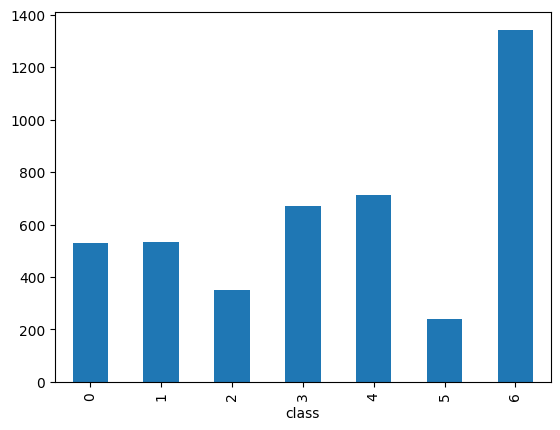

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline  

human_dna = pd.read_table('human_data.txt')
human_dna.head()

chimp_dna = pd.read_table('chimp_data.txt')
chimp_dna.head()

dog_dna = pd.read_table('dog_data.txt')
dog_dna.head()


#Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string.
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

#Now we can convert our training data sequences into short overlapping k-mers of legth 6. Lets do that for each species of data we have using our getKmers function.
human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)
chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)
dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

#Now, our coding sequence data is changed to lowercase, split up into all possible k-mer words of length 6 and ready for the next step.

#Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into #string sentences of words that the count vectorizer can use. We can also make a y variable to hold the class labels.
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna


#Now let's do the same for chimp and dog.
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chim = chimp_dna.iloc[:, 0].values # y_chim for chimp_dna

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values  # y_dog for dog_dna

#Now let's review how to use sklearn's "Natural Language" Processing tools to convert our k-mer words into uniform length numerical vectors that represent counts for #every k-mer in the vocabulary

# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

#Let's see what we have... for human we have 4380 genes converted into uniform length feature vectors of 4-gram k-mer (length 6) counts. For chimp and dog we have the expected same number of features with 1682 and 820 genes respectively.

print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

human_dna['class'].value_counts().sort_index().plot.bar()

chimp_dna['class'].value_counts().sort_index().plot.bar()

dog_dna['class'].value_counts().sort_index().plot.bar()

"""
So now that we know how to transform our DNA sequences into uniform length numerical vectors in the form of k-mer counts and ngrams, we can now go ahead and build a classification model that can predict the DNA sequence function based only on the sequence itself.
Here I will use the human data to train the model, holding out 20% of the human data to test the model. Then we can really challenge the model's generalizability by trying to predict sequence function in other species (the chimpanzee and dog).
So below we will - 1: train/test spit. 2: Build simple multinomial naive Bayes classifier and 3: test the model performance."""

# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_human, 
                                                    test_size = 0.20, 
                                                    random_state=42)


print(X_train.shape)
print(X_test.shape)

#A multinomial naive Bayes classifier will be created. I previously did some parameter tuning and found the ngram size of 4 (reflected in the Countvectorizer() instance) and a model alpha of 0.1 did the best. Just to keep it simple I won't show that code here.

### Multinomial Naive Bayes Classifier ###
# The alpha parameter was determined by grid search previously
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

#Now let's make predictions on the human hold out test set and see how it performes on unseen data.

y_pred = classifier.predict(X_test)

"""
Okay, so let's look at some model performce metrics like the confusion matrix, accuracy, precision, recall and f1 score. We are getting really good results on our unseen data, so it looks like our model did not overfit to the training data. In a real project I would go back and sample many more train test splits since we have a relatively small data set.

"""
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

"""
Now for the real test. Let's see how our model perfoms on the DNA sequences from other species. First we'll try the Chimpanzee, which we would expect to be very similar to human. Then we will try man's (and woman's) best friend, the Dog DNA sequences.
"""
#Make predictions for the Chimp and dog sequences¶

# Predicting the chimp, dog and worm sequences
y_pred_chimp = classifier.predict(X_chimp)
y_pred_dog = classifier.predict(X_dog)

# performance on chimp genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

# performance on dog genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))
